Python
=======                     최소한 robots.txt는 확인하자. 
                            (수집) 1. 트래픽, 2. 이용약, 3. 개인정보 X, 4. DB(저작물) 
                            => 개인, 연구용, 나혼자, 배포, 폐기, OpenAPI(data.go.kr), 기관 요청 (정보공개청구)
urllib 
=======  => Req / Resp 
            urlopen (url : str => request obj)
            header => code, reason, headers ...
            200, 400 (내 잘못), 500(걔 잘못)
            Google,   Naver,  Daum        => robots.txt * 거부
            정책,서비스  정책,    정책, 서비스
 HTTP
TCP/IP => 쌍

In [1]:
# 키워드 : 뉴진스
from urllib import request
from urllib.error import HTTPError

url = 'https://www.google.com/search?q=%EB%89%B4%EC%A7%84%EC%8A%A4&oq=&aqs=chrome.0.69i59j46i131i433i512j46i199i433i465i512j0i433i512j46i131i433i512j0i131i433i512j69i60l2.2045j1j7&sourceid=chrome&ie=UTF-8'

try:
    resp = request.urlopen(url)
    # HTP.response.code, reason, headers... -> request obj 필요
except HTTPError as e:
    print(e)


HTTP Error 403: Forbidden


In [ ]:
# 개발자 도구
# element : dome
# Console : JS CLI -> 해당 변수를 가지고 작업한 내용을 확인할 수 있음.
# Network : 중요. 실제로 주고받은 로그 탭.
# Fetch / XHR : 백그라운드 단 동작 확인.
# Request header : 요청 보낼 때 이렇게 했어야 한다.
# X-Client-data : 주로 필요한 값
# User agent : 브라우저에서 내가 사용하는 에이전트값.


In [3]:
from urllib.request import Request #request obj 

ua = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'

req = Request(url, headers= {'user-agent' :  ua}, method= 'GET') # header를 key : value로 주입.

In [5]:
req.full_url, req.method, req.headers

('https://www.google.com/search?q=%EB%89%B4%EC%A7%84%EC%8A%A4&oq=&aqs=chrome.0.69i59j46i131i433i512j46i199i433i465i512j0i433i512j46i131i433i512j0i131i433i512j69i60l2.2045j1j7&sourceid=chrome&ie=UTF-8',
 'GET',
 {'User-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'})

In [7]:
from urllib.request import urlopen
resp = urlopen(req)

In [9]:
resp.code, resp.reason, resp.getheaders()
# 내용이 저번과 조금 다른 것을 확인할 수 있다. 

(200,
 'OK',
 [('Content-Type', 'text/html; charset=UTF-8'),
  ('Date', 'Mon, 03 Jul 2023 01:29:51 GMT'),
  ('Expires', '-1'),
  ('Cache-Control', 'private, max-age=0'),
  ('Strict-Transport-Security', 'max-age=31536000'),
  ('Content-Security-Policy',
   "object-src 'none';base-uri 'self';script-src 'nonce-C_OiUxC7piBVibRrp192GQ' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/cdt1"),
  ('Cross-Origin-Opener-Policy', 'same-origin-allow-popups; report-to="gws"'),
  ('Report-To',
   '{"group":"gws","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/gws/cdt1"}]}'),
  ('Accept-CH', 'Sec-CH-UA-Platform'),
  ('Accept-CH', 'Sec-CH-UA-Platform-Version'),
  ('Accept-CH', 'Sec-CH-UA-Full-Version'),
  ('Accept-CH', 'Sec-CH-UA-Arch'),
  ('Accept-CH', 'Sec-CH-UA-Model'),
  ('Accept-CH', 'Sec-CH-UA-Bitness'),
  ('Accept-CH', 'Sec-CH-UA-Full-Version-List'),
  ('Accept-CH', 'Sec-CH-UA-WoW64'),
  ('P

In [10]:
body = resp.read()

(bytes,
 '<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>뉴진스 - Google 검색</title><script nonce="C_OiUxC7piBVibRrp192GQ">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'jySiZKfpKP3R2roPyeCIsAY\',kEXPI:\'31\',kBL:\'pp_6\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&
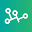
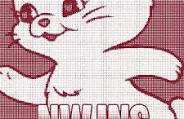
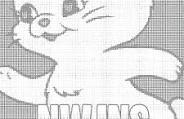
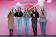
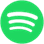
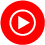
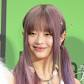
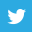
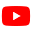
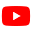
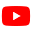
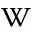
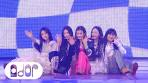
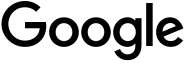
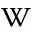

In [11]:
type(body), body.decode('utf8')

urlopen(str or Request obj)
        => URL, => user-agent (기본적으로 잘 작성해야 함. -> Browser)
        => 403  => 200 (* -> 1차적으로 걸러내는 값이 user-agent.)
desktop - user-agent, mobile = user-agent 

In [18]:
url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EB%89%B4%EC%A7%84%EC%8A%A4'
req = Request(url, headers= {'user-agent' : ua}, method= 'GET')

In [19]:
resp = urlopen(req)
content = resp.read()

In [20]:
resp.code, resp.reason, resp.getheaders()

(200,
 'OK',
 [('Date', 'Mon, 03 Jul 2023 01:40:43 GMT'),
  ('Content-Type', 'text/html; charset=utf-8'),
  ('Transfer-Encoding', 'chunked'),
  ('Connection', 'close'),
  ('Vary', 'Accept-Encoding'),
  ('Set-Cookie',
   'uvkey=ZKInG3Gq9uIp3PnrX1DzawAAAHo; expires=Thu, 30-Jun-2033 01:40:43 GMT; path=/; domain=.search.daum.net;'),
  ('Set-Cookie',
   '_ksk=ZKInG3Gq9uIp3PnrX1DzawAAAHo; expires=Fri, 01-Sep-2023 01:40:43 GMT; path=/; domain=.search.daum.net;'),
  ('Set-Cookie',
   'ODT=MS2Z_NNSZ_IIMZ_TWAZ_1DVZ_VOIZ_IVRZ_; expires=Tue, 02-Jul-2024 01:40:43 GMT; path=/; domain=.search.daum.net;'),
  ('Set-Cookie',
   'DDT=GG2Z_SNYZ_LB2Z_DICZ_; expires=Tue, 02-Jul-2024 01:40:43 GMT; path=/; domain=.search.daum.net;'),
  ('Set-Cookie',
   'DTQUERY=%EB%89%B4%EC%A7%84%EC%8A%A4; expires=Tue, 02-Jul-2024 01:40:43 GMT; path=/; domain=.search.daum.net;'),
  ('Vary', 'Accept-Encoding'),
  ('Server', 'kws'),
  ('Cache-Control', 'private, no-cache, max-age=0'),
  ('Expires', '-1'),
  ('X-Content-Type-Op

In [21]:
content.decode('utf8')

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="pc mac chrome">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content="뉴진스 &ndash; Daum 검색" />\n<meta property="og:url" content="https://search.daum.net/search?w=tot&q=%EB%89%B4%EC%A7%84%EC%8A%A4" />\n<meta property="og:description" content="Daum 검색에서 뉴진스에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />\n<meta property="og:site_name" content="다음검색" />\n<title>뉴진스 &ndash; Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search

In [24]:
from html import unescape
url = 'https://www.google.com'

resp = urlopen(url)
resp.read().decode('iso-8859-1')

'&#44404;&#47548', unescape('&#44404;&#47548')


('&#44404;&#47548', '굴림')

In [28]:
# '&#___문자lt,gt,..., + CODE__; => HTML Entity

In [29]:
'굴', ord('굴'), hex(ord('굴'))

('굴', 44404, '0xad74')

In [30]:
ord('뉴'), '&#45684', unescape('&#45684') # Non-ASCII 코드를 인코딩 셋에 대해 인코딩하는 방식 -> 예시 : utf8, latin1, ...

(45684, '&#45684', '뉴')

In [31]:
'뉴'.encode('euc-kr')
# 1. => unicode

b'\xb4\xba'

In [38]:
url2 = 'https://www.google.com/search?q=%EB%89%B4%EC%A7%84%EC%8A%A4&oq=&aqs=chrome.0.69i59j46i131i433i512j46i199i433i465i512j0i433i512j46i131i433i512j0i131i433i512j69i60l2.2045j1j7&sourceid=chrome&ie=UTF-8'

# 주소 이후 ?q : 파라미터 시작, & : 파라미터 간 구분기호, = : 파라미터 key-value
# GET (파라미터가 주소에 포함) => Request / Body 포함되지 않음.
# POST / PUT (파라미터가 Body에 포함) => Request / Body 포함.
# ===> 모든 종류의 파라미터는 반드시 Bytes(encode/decode)
# 한글 : Trigem, 완성형, 확장완성형, 유니코드 (utf-8) => 이를 확인하기 위해 Header 확인.
# HTML entities(Hexadecimal => 10진수) => unescape


In [32]:
'%EB%89%B4%EC%A7%84%EC%8A%A4' 
# % encoding : GET 방식으로 Non-ASCII 코드를 실어 보내는 방식. 모든 데이터는 byte 방식으로 송수신해야함.
# Bytes(ASCII 가능, Non-ASCII -> Hexa 방식으로 %와 함께.)

'%EB%89%B4%EC%A7%84%EC%8A%A4'

In [40]:
from urllib.parse import urlunparse, unquote, quote

In [35]:
unquote('%EB%89%B4 %EC%A7%84 %EC%8A%A4') # 수집 시 한글로 변환할 수 있는 코드.
# 문자와 코드를 구분 -> Percent Encoding

'뉴 진 스'

In [41]:
quote('뉴진스')

'%EB%89%B4%EC%A7%84%EC%8A%A4'

In [44]:
ord('뉴'), hex(ord('뉴')), '뉴'.encode('utf8')
# ASCII(10진수), 16진수, utf-8로 인코딩
#                   TCP/IP: ________ + percent -> req
# HTML Entity -> body

(45684, '0xb274', b'\xeb\x89\xb4')

In [45]:
url2

'https://www.google.com/search?q=%EB%89%B4%EC%A7%84%EC%8A%A4&oq=&aqs=chrome.0.69i59j46i131i433i512j46i199i433i465i512j0i433i512j46i131i433i512j0i131i433i512j69i60l2.2045j1j7&sourceid=chrome&ie=UTF-8'

In [47]:
from urllib.parse import urlparse, urlunparse


In [50]:
urlparse(url2)
# scheme,      neloc,     path,     params,     query,    fragment
# => HTTP(s) => Domain   => 주소                => qs     => 

ParseResult(scheme='https', netloc='www.google.com', path='/search', params='', query='q=%EB%89%B4%EC%A7%84%EC%8A%A4&oq=&aqs=chrome.0.69i59j46i131i433i512j46i199i433i465i512j0i433i512j46i131i433i512j0i131i433i512j69i60l2.2045j1j7&sourceid=chrome&ie=UTF-8', fragment='')

In [52]:
from urllib.parse import parse_qs, parse_qsl

parse_qs(urlparse(url2).query), \
parse_qsl(urlparse(url).query)

# QueryString을 Python 데이터의 형태로 파싱(변환)
# parse_qs(dict로 리턴), parse.qsl(list)

({'q': ['뉴진스'],
  'aqs': ['chrome.0.69i59j46i131i433i512j46i199i433i465i512j0i433i512j46i131i433i512j0i131i433i512j69i60l2.2045j1j7'],
  'sourceid': ['chrome'],
  'ie': ['UTF-8']},
 [])

In [55]:
params = parse_qs(urlparse(url2).query)
params['q'] = '검색어'
params

{'q': '검색어',
 'aqs': ['chrome.0.69i59j46i131i433i512j46i199i433i465i512j0i433i512j46i131i433i512j0i131i433i512j69i60l2.2045j1j7'],
 'sourceid': ['chrome'],
 'ie': ['UTF-8']}

In [56]:
from urllib.parse import urlencode
urlencode(params) # query string의 형테로 역변환

'q=%EA%B2%80%EC%83%89%EC%96%B4&aqs=%5B%27chrome.0.69i59j46i131i433i512j46i199i433i465i512j0i433i512j46i131i433i512j0i131i433i512j69i60l2.2045j1j7%27%5D&sourceid=%5B%27chrome%27%5D&ie=%5B%27UTF-8%27%5D'

In [57]:
urlparse(url2)

ParseResult(scheme='https', netloc='www.google.com', path='/search', params='', query='q=%EB%89%B4%EC%A7%84%EC%8A%A4&oq=&aqs=chrome.0.69i59j46i131i433i512j46i199i433i465i512j0i433i512j46i131i433i512j0i131i433i512j69i60l2.2045j1j7&sourceid=chrome&ie=UTF-8', fragment='')

In [61]:
newurl = urlunparse(urlparse(url2)[:4] + (urlencode(params), ' ')) # 도메인 + 파라미터 재결합.

In [62]:
req = Request(newurl, headers={'user-agent' : ua}, method= 'GET')
resp = urlopen(req)

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>검색어 - Google 검색</title><script nonce="tf3ugs2fCF0gjjK74dxfsg">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'XC-iZNuGLdzh2roP69mAkAM\',kEXPI:\'31\',kBL:\'pp_6\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&(!a.getA
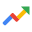
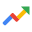
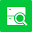
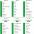
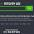
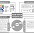
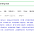
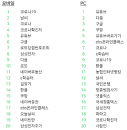
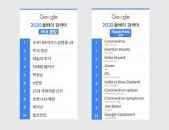
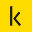
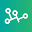
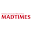
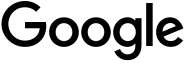

In [63]:
resp.read().decode('utf8')

In [65]:
'''
Request  / Response 
    1. URL 어떻게 전달할까?
    2. 정책 (robots.txt) 때문에, header(user-agent)
    3. Parameters 어떻게 전달할까? GET (주소에 전달함.)
        A. ASCII
        B. Non-ASCII -> hexadecimal(16진수) -> Percent Encoding (%16진수)
                                             %___%___%___%___, ... 
    4. Params 규칙. ?(뒤가 파라미터), &(파라미터 구분), = (key,value)
    5. urlparse(URL:str) -> 6개의 컴포넌트(scheme, netloc, path, param, qs, frag)
    6. urlunparse(6-components) -> URL:str
    7. QueryString:str -> parse_qs(dict), parse_qsl(list)
        Non-ASCII => ? (한글인 경우)
    5. HTML(Document) 상에서 Non-ASCII(HTML-Entity) -> &#_____; (10진수)
'''

'\nRequest  / Response \n    1. URL 어떻게 전달할까?\n    2. 정책 (robots.txt) 때문에, header(user-agent)\n    3. Parameters 어떻게 전달할까? GET (주소에 전달함.)\n        A. ASCII\n        B. Non-ASCII -> hexadecimal(16진수) -> Percent Encoding (%16진수)\n                                             %___%___%___%___, ... \n    4. Params 규칙. ?(뒤가 파라미터), &(파라미터 구분), = (key,value)\n    5. urlparse(URL:str) -> 6개의 컴포넌트(scheme, netloc, path, param, qs, frag)\n    6. urlunparse(6-components) -> URL:str\n    7. QueryString:str -> parse_qs(dict), parse_qsl(list)\n    5. HTML(Document) 상에서 Non-ASCII(HTML-Entity) -> &#_____; (10진수)\n'

In [73]:
params = {
    'q' : '김치찌개',
}

url = urlunparse(('https', 'www.google.com', '/search', '', urlencode(params), ''))
req = Request(url, headers={'user-agent' : ua}, method= 'GET')

try:
    resp = urlopen(req)
except HTTPError as e:
    print(e)

In [74]:
resp.getheaders()

[('Content-Type', 'text/html; charset=UTF-8'),
 ('Date', 'Mon, 03 Jul 2023 02:57:21 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Strict-Transport-Security', 'max-age=31536000'),
 ('Content-Security-Policy',
  "object-src 'none';base-uri 'self';script-src 'nonce-X9PXu-hsp3MmhXyPambCwQ' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/cdt1"),
 ('Cross-Origin-Opener-Policy', 'same-origin-allow-popups; report-to="gws"'),
 ('Report-To',
  '{"group":"gws","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/gws/cdt1"}]}'),
 ('Accept-CH', 'Sec-CH-UA-Platform'),
 ('Accept-CH', 'Sec-CH-UA-Platform-Version'),
 ('Accept-CH', 'Sec-CH-UA-Full-Version'),
 ('Accept-CH', 'Sec-CH-UA-Arch'),
 ('Accept-CH', 'Sec-CH-UA-Model'),
 ('Accept-CH', 'Sec-CH-UA-Bitness'),
 ('Accept-CH', 'Sec-CH-UA-Full-Version-List'),
 ('Accept-CH', 'Sec-CH-UA-WoW64'),
 ('Permissions-Policy', 'unload=()')

In [75]:
import re
re.search(r'<title>(.+)</title>', resp.read().decode('utf8')).group(1)

'김치찌개 - Google 검색'

In [78]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EA%B2%80%EC%83%89'

In [79]:
urlparse(url)

ParseResult(scheme='https', netloc='search.naver.com', path='/search.naver', params='', query='where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EA%B2%80%EC%83%89', fragment='')

In [80]:
unquote('%EA%B2%80%EC%83%89')

'검색'

In [92]:
# 네이버 (파라미터) 실습
#params = {
#    'where' : 'nexearch',
#    'query' : '김치찌개',
#}

components = urlparse(url)
params = parse_qs(components.query)

params['query'] = '김치찌개'

url = urlunparse(('https', 'search.naver.com', '/search.naver', '', urlencode(params), ''))
req = Request(url, headers={'user-agent' : ua}, method= 'GET')

try:
    resp = urlopen(req)
except HTTPError as e:
    print(e)

In [93]:
url

'https://search.naver.com/search.naver?where=%5B%27nexearch%27%5D&query=%EA%B9%80%EC%B9%98%EC%B0%8C%EA%B0%9C'

In [94]:
resp.code, resp.reason, resp.getheaders()

(200,
 'OK',
 [('Date', 'Mon, 03 Jul 2023 03:08:04 GMT'),
  ('Content-Type', 'text/html; charset=UTF-8'),
  ('Transfer-Encoding', 'chunked'),
  ('Connection', 'close'),
  ('Vary', 'Accept-Encoding'),
  ('Set-Cookie',
   'page_uid=i64JDsprvh8ss6WOc58ssssss5s-449809; path=/; domain=.naver.com'),
  ('Set-Cookie',
   '_naver_usersession_=rKgFkh16/w14H5Fc702D0g==; path=/; expires=Mon, 03-Jul-23 03:13:04 GMT; domain=.naver.com'),
  ('X-Frame-Options', 'SAMEORIGIN'),
  ('X-XSS-Protection', '1; report=/p/er/post/xss'),
  ('Cache-Control', 'no-cache, no-store, must-revalidate, max-age=0'),
  ('Pragma', 'no-cache'),
  ('Set-Cookie',
   'nx_ssl=2; Domain=.naver.com; Path=/; Expires=Wed, 02-Aug-2023 03:08:04 GMT;'),
  ('Referrer-Policy', 'unsafe-url'),
  ('Vary', 'Accept-Encoding'),
  ('Server', 'nxg'),
  ('Accept-CH',
   'Sec-CH-UA, Sec-CH-UA-Arch, Sec-CH-UA-Bitness, Sec-CH-UA-Full-Version-List, Sec-CH-UA-Mobile, Sec-CH-UA-Model, Sec-CH-UA-Platform, Sec-CH-UA-Platform-Version, Sec-CH-UA-WoW64')])

In [99]:
url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EA%B2%80%EC%83%89'

In [117]:
# 다음 (파라미터) 실습


components = urlparse(url)
params = parse_qs(components.query)
for k, v in params.items():
    params[k] = ' '.join(v)

params['q'] = '김치찌개'

url = urlunparse((components.scheme, components.netloc, components.path, components.params, urlencode(params), components.fragment))
req = Request(url, headers={'user-agent' : ua}, method= 'GET')

try:
    resp = urlopen(req)
except HTTPError as e:
    print(e)

In [118]:
url

'https://search.daum.net/search?w=%5B%27%5B%5C%27%5B%5C%5C%5C%27%5B%5C%5C%5C%5C%5C%5C%5C%27%5B%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%27%5B%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%27%5B%22%5B%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%27tot%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%27%5D%22%5D%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%27%5D%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%27%5D%5C%5C%5C%5C%5C%5C%5C%27%5D%5C%5C%5C%27%5D%5C%27%5D%27%5D&DA=%5B%27%5B%5C%27%5B%5C%5C%5C%27%5B%5C%5C%5C%5C%5C%5C%5C%27%5B%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%27%5B%5C%5C%5C%5C%5C%5C%5C%5C%5C%5C%5

In [119]:
resp.code, resp.reason, resp.getheaders()

(200,
 'OK',
 [('Date', 'Mon, 03 Jul 2023 03:16:22 GMT'),
  ('Content-Type', 'text/html; charset=utf-8'),
  ('Content-Length', '149'),
  ('Connection', 'close'),
  ('Vary', 'Accept-Encoding'),
  ('Set-Cookie',
   'uvkey=ZKI9huM2E6i1Ia5hyJ1-AgAAAGY; expires=Thu, 30-Jun-2033 03:16:22 GMT; path=/; domain=.search.daum.net;'),
  ('Set-Cookie',
   '_ksk=ZKI9huM2E6i1Ia5hyJ1-AgAAAGY; expires=Fri, 01-Sep-2023 03:16:22 GMT; path=/; domain=.search.daum.net;'),
  ('Vary', 'Accept-Encoding'),
  ('Server', 'kws'),
  ('Cache-Control', 'private, no-cache, max-age=0'),
  ('Expires', '-1'),
  ('X-Content-Type-Options', 'nosniff'),
  ('X-XSS-Protection', '1'),
  ('Accept-CH',
   'Sec-CH-UA-Arch, Sec-CH-UA-Bitness, Sec-CH-UA-Full-Version-List, Sec-CH-UA-Model, Sec-CH-UA-Platform-Version, Sec-CH-UA-WoW64'),
  ('Permissions-Policy',
   'ch-ua-arch=(self "https://sl.search.daum.net"), ch-ua-bitness=(self "https://sl.search.daum.net"),  ch-ua-full-version-list=(self "https://sl.search.daum.net"),  ch-ua-model

In [120]:
resp.read().decode()

'<script type="text/javascript">\nlocation.replace( "/search?DA=&https_on=on&q=%EA%B9%80%EC%B9%98%EC%B0%8C%EA%B0%9C&t__nil_searchbox=&w=" );\n</script>\n'